# The Sparks Foundation

## GRIP(Graduate Rotational Internship Program) Feb-2023

## Author : Gaurav Bhagwan Patil

## Domain : Data Science & Business Analytics

### Task 1 - Prediction using Supervised Machine Learning

### Problem Statement :   
Predict the percentage of a student based on the number of study hours.What will be the predicted score if a student studies for 9.25 hrs/day?

### Importing all required libraries in this notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline

### Importing Dataset

In [10]:
data= pd.read_csv("Downloads/sparkdata1.txt")
print("Data imported sucessfully")                                        

Data imported sucessfully


In [11]:
data.head(10)           # display the first(top) 10 rows

 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
data.info                                               #Info regarding the entir dataframe(Data types of each columns)

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [3]:
data.describe().T                                           #Displays statsticial information of dataset

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


The Average the study hours of student's  5.012000

The Average scores of student's  51.48

In [30]:
data.shape                                                 #There are 25 rows and 2 columns

(25, 2)

In [13]:
data.isna().values.any()                                        #Checking null values

False

Here,there is no Null value present in data

### Data Visulization

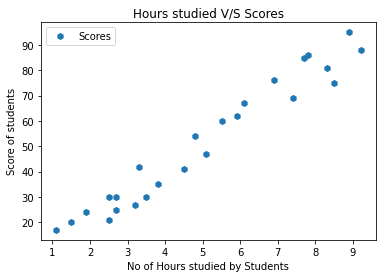

In [3]:
data.plot(x='Hours',y='Scores',style='h')
plt.title("Hours studied V/S Scores")
plt.xlabel('No of Hours studied by Students')
plt.ylabel('Score of students')
plt.show()

Here,from the above graph we see that there is strongly positive linear realtionship between the number of hours studied by students and scores of students.

In [4]:
X=[['Study Hours']]                         #Divide the data into "Attributes"(inputs) and "labels"(outputs)
Y=[['Scores obatined']]

<AxesSubplot:>

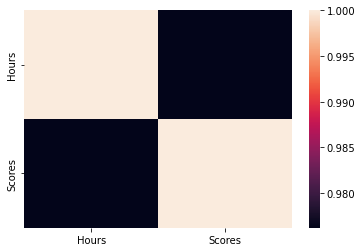

In [7]:
correlation= data.corr()                      #ploting heatmap to find any correaltion
sns.heatmap(correlation)

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

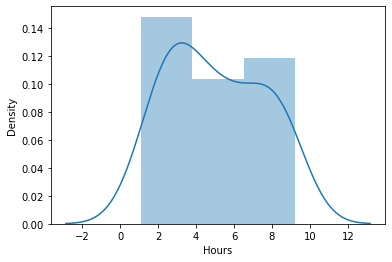

In [12]:
sns.distplot(data['Hours'])                        #Distrubution plot no of hours students studied

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

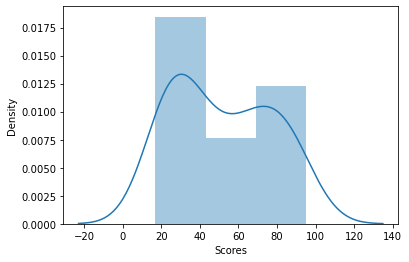

In [13]:
sns.distplot(data['Scores'])                                     #Distrubution plot of scores of students

### Fitting Linear Model  & Spliting the data into training and testing data

In [15]:
X= data.iloc[:,:-1].values         #the slicing will show all rows & 0th columns only (Hours, independent)
Y= data.iloc[:, 1].values          #the slicing will show all rows & 1st columns only (Scores, dependent)

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg=LinearRegression()

In [20]:
reg.fit(X_train,y_train)

print("Training Completed")

Training Completed


In [21]:
reg.coef_                # Gives slope of the regression line

array([9.91065648])

In [22]:
reg.intercept_            #Gives intercept of regression line

2.018160041434683

In [23]:
reg.score(X_train,y_train)            

0.9515510725211552

making predictions on test data 

In [51]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Plotting of regression line

In [52]:
line = reg.coef_*X+ reg.intercept_ # bestfit line

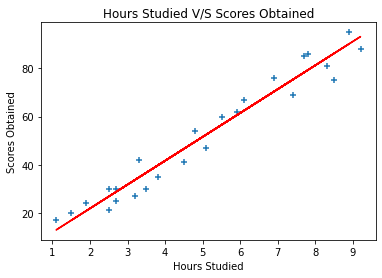

In [54]:
#Plotting for the test data

plt.scatter(X,Y, marker='+')
plt.plot(X,line,color="red")
plt.title("Hours Studied V/S Scores Obtained")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

Computing Actual values V/S Predicted values

In [56]:
y_pred=reg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [68]:
Hrs =[[9.25]]
result= reg.predict(Hrs)
print(" If a Student studied 9.25 Hours daily, then his score will be" , result)

 If a Student studied 9.25 Hours daily, then his score will be [93.69173249]


####  If a Student studied 9.25 Hours daily, then his score will be 93.69173248737538 

## Evaluate the model

Evalute the performance of model using__ MSE(MEAN SQUARE ERROR) & MAE(MEAN ABSOLUTE ERROR)


In [69]:
from sklearn import metrics
print("Mean Square Error", metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))


Mean Square Error 21.5987693072174
Mean Absolute Error 4.183859899002975


# Thank You..!! 